In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize']  = 13,5
rcParams['lines.linewidth'] = 2.8
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'
rcParams['axes.grid'] = True
plt.rc('axes',axisbelow=True)

In [3]:
df = pd.read_csv("D:\Data\e_commerce.csv",encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.duplicated().sum()

5268

In [7]:
# Remove duplicate data

df.drop_duplicates(inplace=True)

In [8]:
# Remove anon customer 

df.dropna(inplace=True)

In [9]:
df['TotalPrice'] = df.Quantity*df.UnitPrice

In [10]:
df.shape

(401604, 9)

- We have 541909 observations
- Then, after remove anon customer, the number of observations becomes 401604

### Check cancelled order

In [11]:
len(df.InvoiceNo.str.startswith('C')) == len(df.Quantity < 0)

# we know that when quantity order less than zero, order has been cancelled

True

In [12]:
cancel_order = df[df.InvoiceNo.str.startswith('C')]
cancel_order.shape

(8872, 9)

- Total cancelled order = 8872

### company give free price for certain products

In [13]:
free_price = df[(df.UnitPrice==0)&(df.Quantity>0)]
free_price.shape

(40, 9)

- Total free price products = 40

In [14]:
df = df[~((df.UnitPrice==0)|(df.InvoiceNo.str.startswith('C')))]

### Remove abnormal stock code ( mainly, the stock code has five unique numbers )

In [15]:
df = df[~(df.StockCode.str.contains("^[a-zA-Z]"))]
df.shape

(391150, 9)

- We have 391150 after remove abnormal stockcode, free price, and cancelled order 

### Checking stock code and Description

In [16]:
uniq = df.groupby(['StockCode']).nunique()
uniq[uniq.Description !=1]['Description']

StockCode
16156L    2
17107D    3
20622     2
20725     2
20914     2
         ..
85184C    2
85185B    2
90014A    2
90014B    2
90014C    2
Name: Description, Length: 213, dtype: int64

Let's check some of them

In [17]:
print(df[df.StockCode=='16156L']['Description'].unique())

['WRAP, CAROUSEL' 'WRAP CAROUSEL']


In [18]:
print(df[df.StockCode=='90014B']['Description'].unique())

['GOLD M PEARL  ORBIT NECKLACE' 'GOLD M.O.P. ORBIT NECKLACE']


In [19]:
print(df[df.StockCode=='85185B']['Description'].unique())

['PINK HORSE SOCK PUPPET' 'PINK HORSE SOCK PUPPET KIT']


- Seems, the difference between two descriptions is just a few typos

In [20]:
df.CustomerID.value_counts()

17841.0    7667
14911.0    5584
14096.0    5095
12748.0    4397
14606.0    2674
           ... 
17443.0       1
15070.0       1
17331.0       1
13270.0       1
16257.0       1
Name: CustomerID, Length: 4334, dtype: int64

Top 3 customers that are most purchase the products

In [21]:
df[(df.CustomerID == 17841)|(df.CustomerID==14911)|(df.CustomerID==14096)].sort_values('CustomerID',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
257547,559535,22222,CAKE PLATE LOVEBIRD WHITE,1,7/10/2011 12:16,4.95,17841.0,United Kingdom,4.95
288422,562161,23212,HEART WREATH DECORATION WITH BELL,4,8/3/2011 11:58,1.25,17841.0,United Kingdom,5.00
285222,561897,22315,200 RED + WHITE BENDY STRAWS,1,7/31/2011 15:24,1.25,17841.0,United Kingdom,1.25
285221,561897,22273,FELTCRAFT DOLL MOLLY,1,7/31/2011 15:24,2.95,17841.0,United Kingdom,2.95
285220,561897,22961,JAM MAKING SET PRINTED,2,7/31/2011 15:24,1.45,17841.0,United Kingdom,2.90
...,...,...,...,...,...,...,...,...,...
467266,576339,22974,CHILDRENS DOLLY GIRL MUG,1,11/14/2011 15:27,3.29,14096.0,United Kingdom,3.29
467265,576339,22961,JAM MAKING SET PRINTED,22,11/14/2011 15:27,3.29,14096.0,United Kingdom,72.38
467264,576339,22960,JAM MAKING SET WITH JARS,2,11/14/2011 15:27,8.29,14096.0,United Kingdom,16.58
467263,576339,22956,36 FOIL HEART CAKE CASES,1,11/14/2011 15:27,4.13,14096.0,United Kingdom,4.13


The number of transactions from those customers are 18703

# Plotting

In [22]:
df_num = df.select_dtypes([float,int]).drop('CustomerID',axis=1)

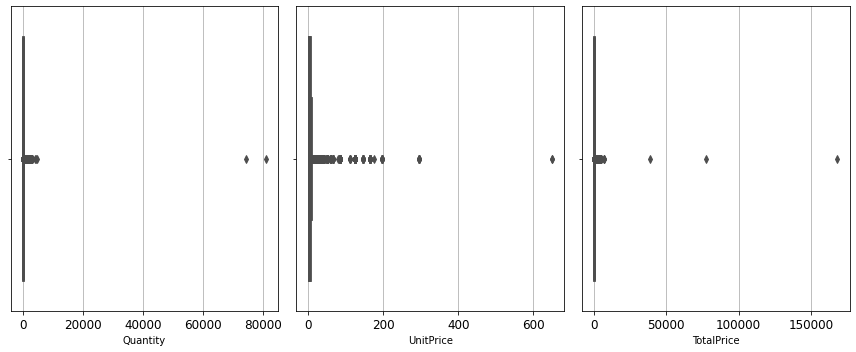

In [23]:
plt.figure(figsize=(12, 5))
for i in range(0, len(df_num.columns)):
    
    plt.subplot(1, len(df_num.columns), i+1)
    sns.boxplot(df[df_num.columns[i]], color='gray')
    plt.tight_layout()

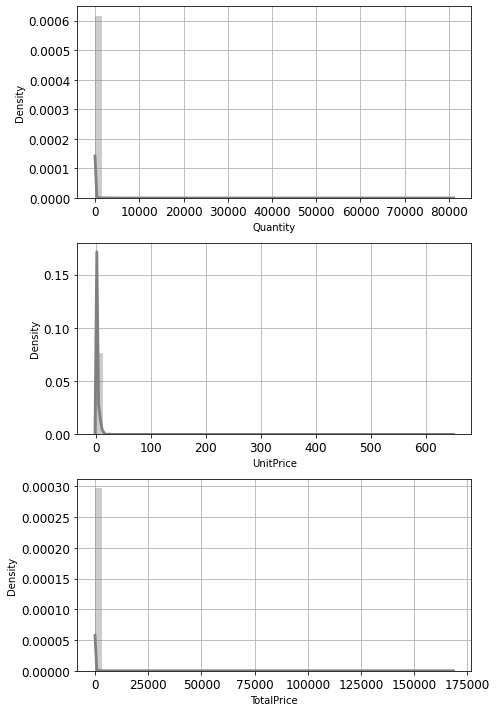

In [24]:
plt.figure(figsize=(7, 10))
for i in range(0, len(df_num.columns)):
    plt.subplot(len(df_num.columns),1, i+1)
    sns.distplot(df[df_num.columns[i]], color='gray')
    plt.tight_layout()

In [25]:
from scipy import stats

filtered_entries1 = np.array([False] * len(df_num))
for col in df_num.columns:
    zscore = abs(stats.zscore(df_num)[col])
    print(np.max(zscore))
    filtered_entries1 = (zscore > 2) | filtered_entries1

data1 = df[~filtered_entries1]

447.8896618900791
150.91387440314296
541.7494452795142


In [26]:
data2 = data1.select_dtypes([float,int]).drop('CustomerID',axis=1)
data3 = data1.select_dtypes('object')

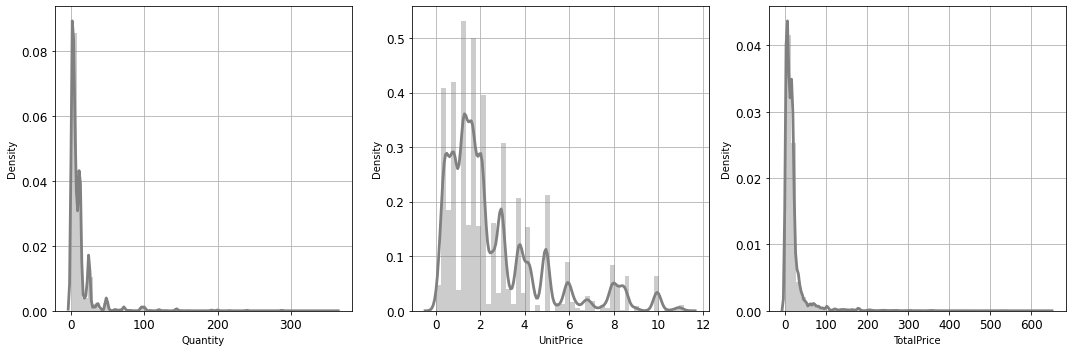

In [27]:
plt.figure(figsize=(15, 5))
for i in range(0, len(data2.columns)):
    plt.subplot(1,len(data2.columns), i+1)
    sns.distplot(data2[data2.columns[i]], color='gray')
    plt.tight_layout()

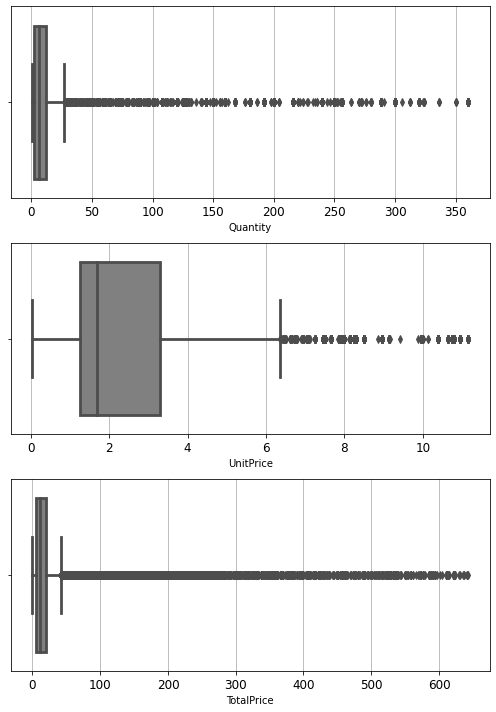

In [28]:
plt.figure(figsize=(7, 10))
for i in range(0, len(data2.columns)):
    plt.subplot(len(data2.columns),1, i+1)
    sns.boxplot(data2[data2.columns[i]], color='gray')
    plt.tight_layout()

## Country, Invoice date, and Product

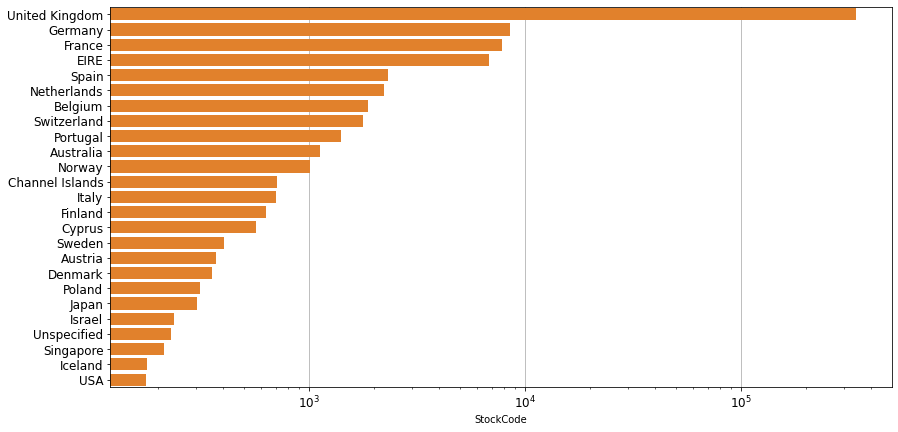

In [29]:
country = data3.groupby('Country').count().sort_values('StockCode',ascending=False).reset_index()

plt.figure(figsize=(14,7))
sns.barplot(y='Country',x='StockCode',data=country.head(25),color='tab:orange')
plt.ylabel('')
plt.xscale("log")

In [30]:
data1['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

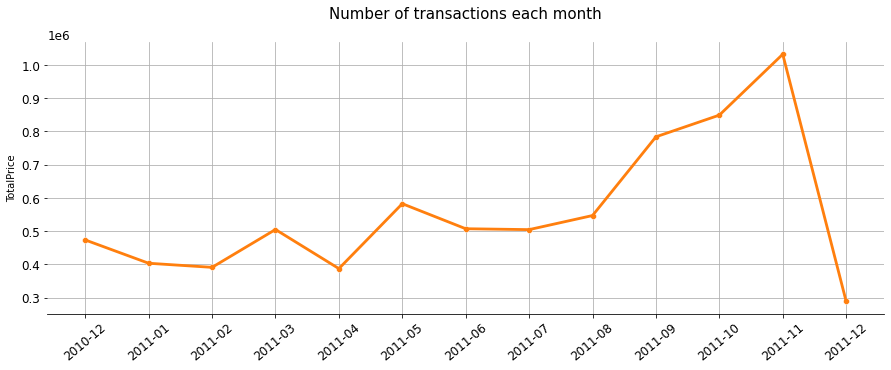

In [31]:
data=data1.groupby('InvoiceDate').sum().reset_index()
data['month'] = data['InvoiceDate'].dt.to_period('M').astype(str)

plt.figure(figsize=(15,5))
sns.lineplot('month','TotalPrice',data=data.groupby('month').sum().reset_index(),
             markers=True, color='tab:orange')
sns.scatterplot('month','TotalPrice',data=data.groupby('month').sum().reset_index(),
                markers=True, color='tab:orange')
plt.title('Number of transactions each month\n', size = 15)
plt.xticks(rotation=40)
plt.xlabel('')
sns.despine(left = True, right = True, bottom = False, top = True)

plt.show()

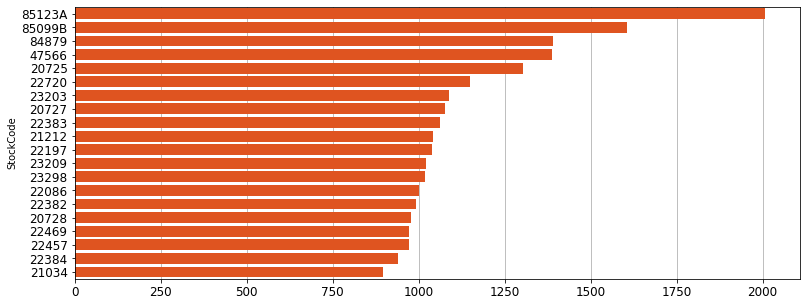

In [32]:
product = data1.groupby('StockCode').count().sort_values('TotalPrice',ascending=False).reset_index()

sns.barplot('Quantity','StockCode',data=product.head(20),color='orangered')
plt.xlabel('')
plt.show()

In [33]:
data1[data1.StockCode=='85123A']['Description']

0         WHITE HANGING HEART T-LIGHT HOLDER
49        WHITE HANGING HEART T-LIGHT HOLDER
66        WHITE HANGING HEART T-LIGHT HOLDER
220       WHITE HANGING HEART T-LIGHT HOLDER
262       WHITE HANGING HEART T-LIGHT HOLDER
                         ...                
538708    CREAM HANGING HEART T-LIGHT HOLDER
539083    CREAM HANGING HEART T-LIGHT HOLDER
539979    WHITE HANGING HEART T-LIGHT HOLDER
540217    WHITE HANGING HEART T-LIGHT HOLDER
541639    CREAM HANGING HEART T-LIGHT HOLDER
Name: Description, Length: 2008, dtype: object

# Cohort Analysis

In [34]:
import datetime as dt

def get_month(x) : return dt.datetime(x.year,x.month,1)
def get_dates(df, col):
        year = df[col].dt.year
        month = df[col].dt.month
        day = df[col].dt.day
        
        return year, month, day

In [35]:
data1['InvoiceMonth'] = data1['InvoiceDate'].apply(get_month)
data1['CohortMonth']  = data1.groupby('CustomerID')['InvoiceMonth'].transform('min')
data1.sample(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
362463,568491,23426,METAL SIGN DROP YOUR PANTS,2,2011-09-27 11:58:00,2.89,15443.0,United Kingdom,5.78,2011-09-01,2011-01-01
147140,549059,85099C,JUMBO BAG BAROQUE BLACK WHITE,1,2011-04-06 10:46:00,2.08,15529.0,United Kingdom,2.08,2011-04-01,2010-12-01
359119,568174,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-09-25 13:23:00,0.95,16261.0,United Kingdom,1.90,2011-09-01,2011-04-01
29564,538808,22045,SPACEBOY GIFT WRAP,25,2010-12-14 12:11:00,0.42,14057.0,United Kingdom,10.50,2010-12-01,2010-12-01
206018,554860,23052,RECYCLED ACAPULCO MAT TURQUOISE,2,2011-05-27 10:20:00,8.25,15249.0,United Kingdom,16.50,2011-05-01,2011-03-01
70957,542107,21891,TRADITIONAL WOODEN SKIPPING ROPE,8,2011-01-25 13:38:00,1.25,16222.0,United Kingdom,10.00,2011-01-01,2011-01-01


In [36]:
invoice_year, invoice_month, invoice_day = get_dates(data1, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_dates(data1, 'CohortMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

data1['CohortIndex'] = 12*year_diff+month_diff+1

In [37]:
cohort_data = data1.groupby(['CohortIndex',
                             'CohortMonth'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,874.0,320.0,281.0,330.0,316.0,347.0,316.0,301.0,306.0,345.0,326.0,441.0,231.0
2011-01-01,409.0,91.0,111.0,94.0,131.0,119.0,103.0,100.0,123.0,136.0,151.0,48.0,NaN
2011-02-01,375.0,68.0,70.0,107.0,102.0,91.0,95.0,104.0,93.0,114.0,27.0,NaN,NaN
2011-03-01,451.0,64.0,112.0,90.0,101.0,74.0,119.0,104.0,125.0,38.0,NaN,NaN,NaN
2011-04-01,297.0,62.0,61.0,62.0,57.0,68.0,65.0,77.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,280.0,54.0,49.0,50.0,59.0,64.0,76.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,239.0,41.0,37.0,64.0,54.0,79.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,189.0,34.0,38.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,172.0,33.0,41.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Above data is our cohort table. 

Example : we have 874 unique customer with their first transaction in 2010-12. Its cohort month is 2010-12 and cohort index is 1. Go on the one right cell, it's 320. Its mean, 320 unique customer retain their transaction for the next month

Retention tables show a group of people that visited your site or used your app for the first time during a certain time frame. They also display the progressive ‘drop-off’ or decline in activity over time for that particular group (a cohort).

Marketers can use Retention tables to analyze the quality of users brought by a marketing campaign and compare it to other sources of traffic.

In [38]:
cohort_sizes = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%Y-%m')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366133,0.321510,0.377574,0.361556,0.397025,0.361556,0.344394,0.350114,0.394737,0.372998,0.504577,0.264302
2011-01,1.0,0.222494,0.271394,0.229829,0.320293,0.290954,0.251834,0.244499,0.300733,0.332518,0.369193,0.117359,NaN
2011-02,1.0,0.181333,0.186667,0.285333,0.272000,0.242667,0.253333,0.277333,0.248000,0.304000,0.072000,NaN,NaN
2011-03,1.0,0.141907,0.248337,0.199557,0.223947,0.164080,0.263858,0.230599,0.277162,0.084257,NaN,NaN,NaN
2011-04,1.0,0.208754,0.205387,0.208754,0.191919,0.228956,0.218855,0.259259,0.074074,NaN,NaN,NaN,NaN
2011-05,1.0,0.192857,0.175000,0.178571,0.210714,0.228571,0.271429,0.092857,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.171548,0.154812,0.267782,0.225941,0.330544,0.096234,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.179894,0.201058,0.222222,0.269841,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.191860,0.238372,0.238372,0.127907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


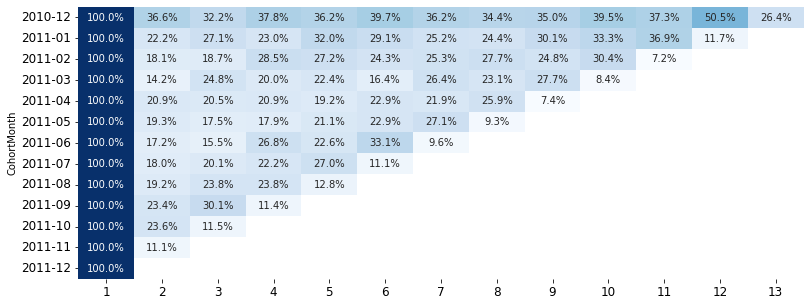

In [39]:
sns.heatmap(retention, cmap='Blues',annot=True, fmt='.1%', annot_kws={'fontsize':10},cbar=False)
plt.xlabel('')
plt.show()

Let's look at above retention rate chart and interpret it.

50.5% of customers who made their first transaction in 2010-12, use this company after eleven months

In [40]:
customer_per_month = data1.groupby('CohortMonth')['CustomerID'].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]
customers

array([4304, 4265, 3941, 3585, 3286, 3114, 2925, 2686, 2406, 2109, 1658,
       1283,  874], dtype=int64)

In [41]:
customer_in_month = data1.groupby('CohortIndex')['CustomerID'].nunique()
customer_in_month

CohortIndex
1     4304
2      957
3      931
4      914
5      893
6      863
7      797
8      712
9      669
10     633
11     504
12     489
13     231
Name: CustomerID, dtype: int64

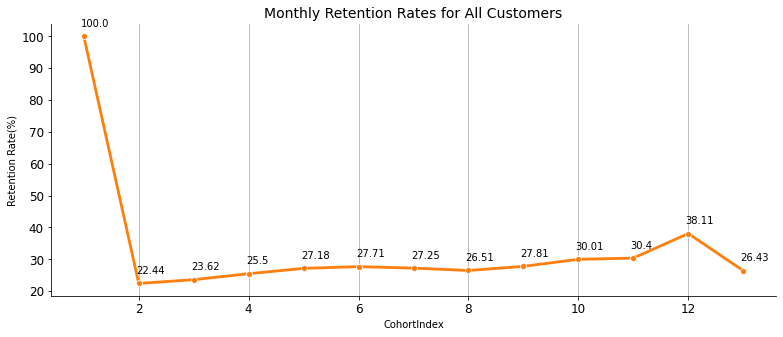

In [42]:
x = customer_in_month.index
y = 100*(customer_in_month/customers)
sns.lineplot(x,y,marker='o',color='tab:orange')
plt.title('Monthly Retention Rates for All Customers',size=14)
plt.ylabel('Retention Rate(%)')

for x,y in zip(x,y):
    plt.text(x-0.05,y+3,s=round(y,2))
plt.grid(axis='y')
sns.despine()

Great !

*Retention rates* increased significantly for the last month of the year

Probably Thanksgiving, Black Friday, and Chrismast cause it. There are a lot of special day at the end of the year

In [43]:
# Monthly revenue and customer

monthly_revenue_df = data1.groupby('InvoiceMonth').agg({'TotalPrice':'sum',
                                                        'CustomerID':'nunique'})
monthly_revenue_df.index = monthly_revenue_df.index.strftime('%Y-%m')

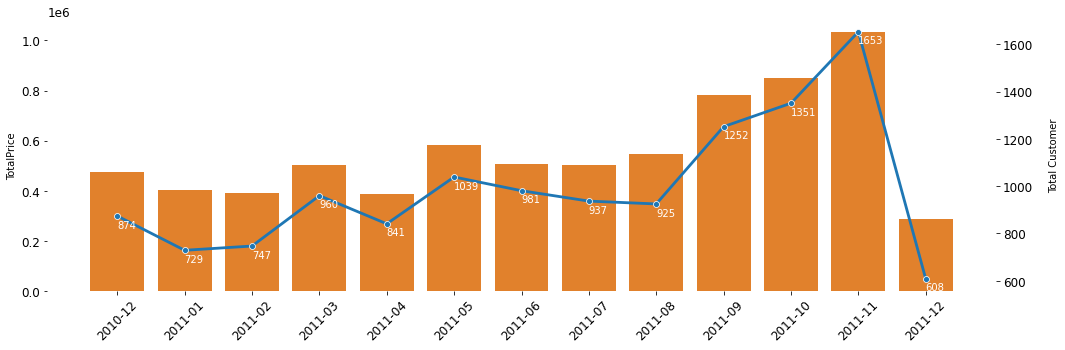

In [44]:
plt.figure(figsize=(17,5))

ax = sns.barplot(x=monthly_revenue_df.index,y=monthly_revenue_df.TotalPrice,color='tab:orange')

ax2 = ax.twinx()
sns.lineplot(x=monthly_revenue_df.index,y=monthly_revenue_df.CustomerID,color= 'tab:blue',ax=ax2,marker='o')
ax.grid(False)
ax.set_xlabel('')
ax2.set_ylabel('\nTotal Customer')
ax2.grid(False)
ax.set_xticklabels(labels=monthly_revenue_df.index,rotation=45)

for i,j in zip(monthly_revenue_df.index,monthly_revenue_df.CustomerID):
    plt.text(i,j-5e1,s=j,color='white')

sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

# Pareto Analysis

In [45]:
pareto_cust = data1.groupby('CustomerID').sum().sort_values('TotalPrice',ascending=False).reset_index()
pareto_cust['CustomerID'] = pareto_cust.CustomerID.astype(str)
pareto_cust['cum_percentage'] = round(pareto_cust.TotalPrice.cumsum()/pareto_cust.TotalPrice.sum()*100,2)
pareto_cust['TotalPrice'] = np.log(pareto_cust.TotalPrice)

In [46]:
interaction_80 = (pareto_cust.shape[0] - pareto_cust[pareto_cust.cum_percentage >= 80].shape[0])
interaction_90 = (pareto_cust.shape[0] - pareto_cust[pareto_cust.cum_percentage >= 90].shape[0])

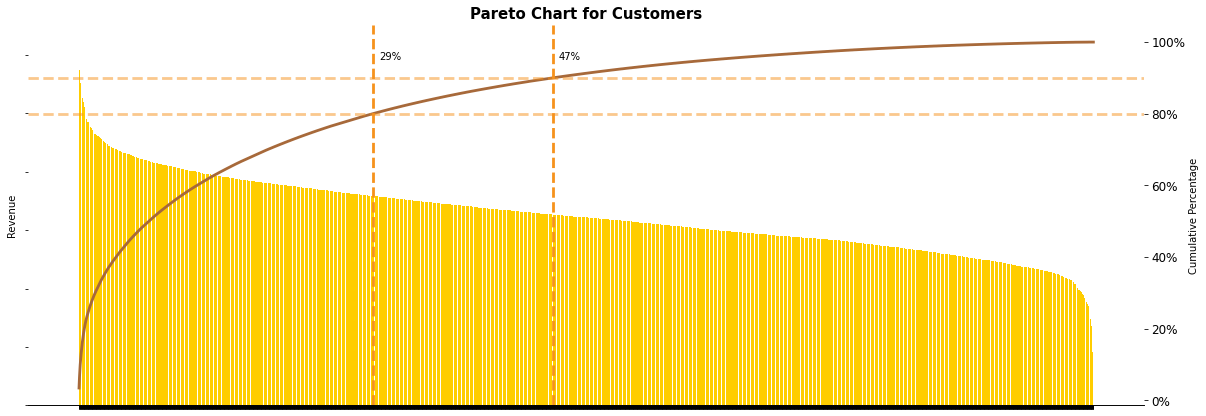

In [47]:
fig, ax = plt.subplots(figsize=(20,7), facecolor='white')

# Plot bars (i.e. frequencies)
ax.bar(pareto_cust.CustomerID, pareto_cust["TotalPrice"],color='#ffcd00')
ax.set_title("Pareto Chart for Customers",size=15,fontweight=650)
ax.set_ylabel("Revenue")
ax.set_xlabel("")
ax.set_xticklabels('')
ax.set_yticklabels('');

# Second y axis (i.e. cumulative percentage)
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(pareto_cust.CustomerID, pareto_cust["cum_percentage"], color="#a7693a", ms=7)
ax2.axhline(80, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.axhline(90, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")
ax2.grid(False)
ax2.set_xticklabels('')

plt.axvline(interaction_80, color = "#f6921d", linestyle = "dashed", alpha = 1)
interaction_80_percentage = round((interaction_80 / pareto_cust.shape[0]) * 100)
plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%") 

plt.axvline(interaction_90, color = "#f6921d", linestyle = "dashed", alpha = 1)
interaction_90_percentage = round((interaction_90 / pareto_cust.shape[0]) * 100)
plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")
sns.despine(top=True,right=True,left=True)
plt.show()

We can see that 80% of company's revenue comes from top 29% of customers 

Also, 90% of company's revenue comes from top 47% of customers

In [48]:
pareto_product = data1.groupby("StockCode").sum().sort_values("TotalPrice",ascending=False).reset_index()
pareto_product['cum_percentage'] = pareto_product.TotalPrice.cumsum()/pareto_product.TotalPrice.sum()*100
pareto_product['TotalPrice'] = np.log(pareto_product.TotalPrice)

In [49]:
interaction_80_p = (pareto_product.shape[0] - pareto_product[pareto_product.cum_percentage >= 80].shape[0])
interaction_90_p = (pareto_product.shape[0] - pareto_product[pareto_product.cum_percentage >= 90].shape[0])

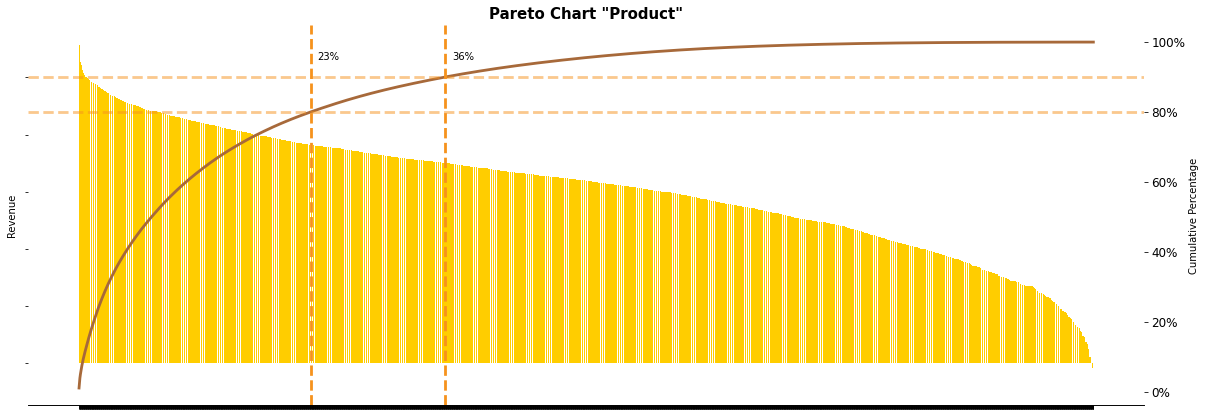

In [50]:
fig, ax = plt.subplots(figsize=(20,7), facecolor='white')

# Plot bars (i.e. frequencies)
ax.bar(pareto_product.StockCode, pareto_product["TotalPrice"],color='#ffcd00')
ax.set_title('Pareto Chart "Product"' ,size=15,fontweight=650)
ax.set_ylabel("Revenue")
ax.set_xlabel("")
ax.set_xticklabels('')
ax.set_yticklabels('');

# Second y axis (i.e. cumulative percentage)
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(pareto_product.StockCode, pareto_product["cum_percentage"], color="#a7693a", ms=7)
ax2.axhline(80, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.axhline(90, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")
ax2.grid(False)
ax2.set_xticklabels('')

plt.axvline(interaction_80_p, color = "#f6921d", linestyle = "dashed", alpha = 1)
interaction_80_percentage_p = round((interaction_80_p / pareto_product.shape[0]) * 100)
plt.text(interaction_80_p + 25, 95, str(interaction_80_percentage_p) + "%") 

plt.axvline(interaction_90_p, color = "#f6921d", linestyle = "dashed", alpha = 1)
interaction_90_percentage_p = round((interaction_90_p / pareto_product.shape[0]) * 100)
plt.text(interaction_90_p + 25, 95, str(interaction_90_percentage_p) + "%")
sns.despine(top=True,right=True,left=True)
plt.show()

To achieve 80% of the company's revenue, it's enough with only 23 percent of the products that have the most revenue and only 36% to earn 90%

In [51]:
#pareto country

pareto_country = data1.groupby('Country').sum().sort_values('TotalPrice',ascending=False).reset_index()
pareto_country['cum_percentage'] = pareto_country.TotalPrice.cumsum()/pareto_country.TotalPrice.sum()*100
pareto_country['TotalPrice'] = np.log(pareto_country.TotalPrice)

In [52]:
interaction_80_c = (pareto_country.shape[0] - pareto_country[pareto_country.cum_percentage >= 80].shape[0])
interaction_90_c = (pareto_country.shape[0] - pareto_country[pareto_country.cum_percentage >= 90].shape[0])

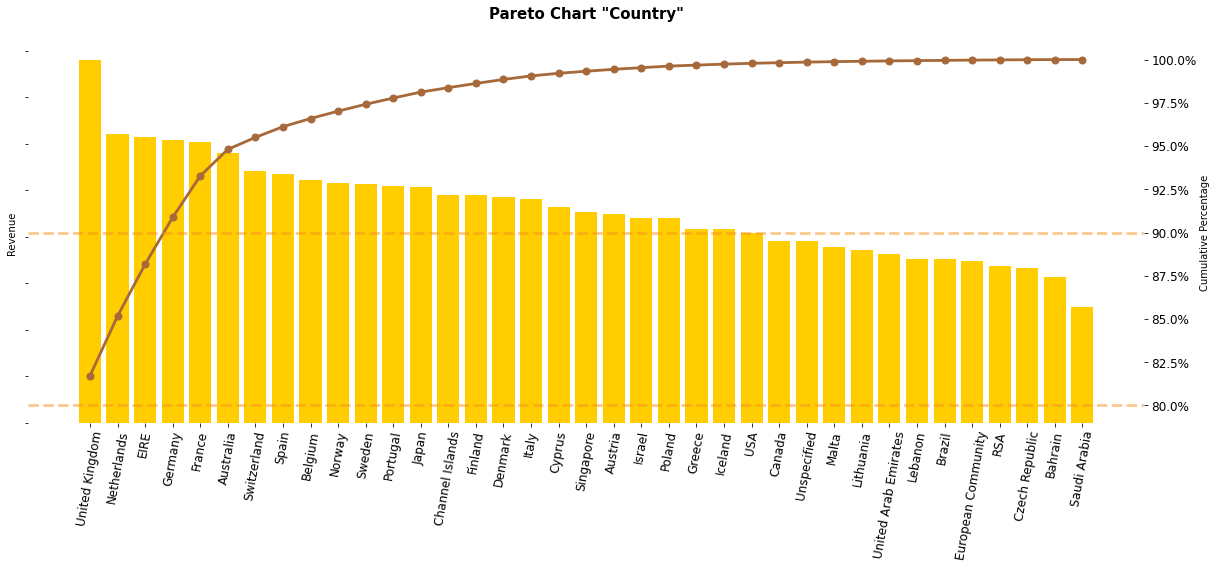

In [53]:
fig, ax = plt.subplots(figsize=(20,7), facecolor='white')

# Plot bars (i.e. frequencies)
ax.bar(pareto_country.Country, pareto_country["TotalPrice"],color='#ffcd00')
ax.set_title('Pareto Chart "Country"\n' ,size=15,fontweight=650)
ax.set_ylabel("Revenue")
# ax.set_xlabel("")
# ax.set_xticklabels('')
ax.set_yticklabels('');

# Second y axis (i.e. cumulative percentage)
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(pareto_country.Country, pareto_country["cum_percentage"], color="#a7693a", ms=7,marker='o')
ax2.axhline(80, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.axhline(90, color="#f6921d", linestyle="dashed",alpha=0.5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")
ax2.grid(False)
# ax2.set_xticklabels()
ax.set_xticklabels(labels=pareto_country.Country,rotation=80)
# plt.axvline(interaction_80_c, color = "tab:orange", linestyle = "dashed", alpha = 1)
interaction_80_percentage_c = round((interaction_80_c / pareto_country.shape[0]) * 100)
# plt.text(interaction_80_c + 25, 95, str(interaction_80_percentage_c) + "%") 

# plt.axvline(interaction_90_c, color = "tab:orange", linestyle = "dashed", alpha = 1)
interaction_90_percentage_c = round((interaction_90_c / pareto_country.shape[0]) * 100)
# plt.text(interaction_90_c + 25, 95, str(interaction_90_percentage_c) + "%")
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

Based on pareto principle, enough only UK users to get 80% company's revenue

In [54]:
pareto_country

,Country,Quantity,UnitPrice,CustomerID,TotalPrice,CohortIndex,cum_percentage
0,United Kingdom,3563047,871430.88,5.300269e+09,15.595458,1749024,81.712114
1,Netherlands,178256,4557.37,3.227874e+07,12.432742,15666,85.169410
2,EIRE,129025,19576.05,1.006731e+08,12.288152,55947,88.161272
3,Germany,116417,21029.96,1.072178e+08,12.190448,43664,90.874645
4,France,108599,18963.82,9.963784e+07,12.066273,40094,93.271162
5,Australia,68311,3001.23,1.407565e+07,11.621331,6418,94.806999
6,Switzerland,29824,4599.92,2.241201e+07,10.824796,5631,95.499490
7,Spain,25418,6424.76,3.008826e+07,10.709896,11845,96.116814
8,Belgium,22799,4817.75,2.322170e+07,10.446309,8534,96.591099
9,Norway,19184,2832.82,1.260213e+07,10.338765,4837,97.017025


# RFM Analysis

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import datetime as dt
from itertools import combinations

In [56]:
data1['InvoiceDate'] = pd.to_datetime(data1.InvoiceDate)

In [57]:
print(data1.InvoiceDate.min())
print(data1.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [58]:
last_day = data1.InvoiceDate.max() + dt.timedelta(days=1)
last_day

Timestamp('2011-12-10 12:50:00')

In [59]:
rfm_table = data1.groupby('CustomerID').agg({'TotalPrice':'sum',
                                             'InvoiceNo' : 'nunique',
                                             'InvoiceDate': lambda x: (last_day - x.max()).days
                                            })

rfm_table = rfm_table.rename({'TotalPrice':'Monetary',
                             'InvoiceNo': 'Frequency',
                             'InvoiceDate':'Recency'},axis=1
                            )
rfm_table

,Monetary,Frequency,Recency
CustomerID,,,
12347.0,4118.75,7,2
12348.0,1437.24,4,75
12349.0,1328.55,1,19
12350.0,294.40,1,310
12352.0,1321.99,7,36
...,...,...,...
18280.0,180.60,1,278
18281.0,46.92,1,181
18282.0,127.05,2,8


In [60]:
r_labels  = range(5,0,-1)
fm_labels = range(1,6)

In [61]:
rfm_table['R'] = pd.qcut(rfm_table.Recency,5,r_labels) 
rfm_table['F'] = pd.qcut(rfm_table.Frequency.rank(method='first'),5,fm_labels) 
rfm_table['M'] = pd.qcut(rfm_table.Monetary,5,fm_labels) 
rfm_table

,Monetary,Frequency,Recency,R,F,M
CustomerID,,,,,,
12347.0,4118.75,7,2,5,5,5
12348.0,1437.24,4,75,2,4,4
12349.0,1328.55,1,19,4,1,4
12350.0,294.40,1,310,1,1,2
12352.0,1321.99,7,36,3,5,4
...,...,...,...,...,...,...
18280.0,180.60,1,278,1,2,1
18281.0,46.92,1,181,1,2,1
18282.0,127.05,2,8,5,3,1


In [62]:
rfm_table['Segment'] = rfm_table.R.astype(str) + rfm_table.F.astype(str) + rfm_table.M.astype(str)
rfm_table['Score']   = rfm_table[['R','F','M']].sum(axis=1)

In [63]:
rfm_table.sample(6)

,Monetary,Frequency,Recency,R,F,M,Segment,Score
CustomerID,,,,,,,,
18094.0,2585.30,7,82,2,5,5,255,12
17647.0,116.11,1,65,3,2,1,321,6
14142.0,311.81,1,373,1,1,2,112,4
16569.0,124.20,1,3,5,2,1,521,8
12386.0,401.90,2,338,1,2,2,122,5
15777.0,1008.86,4,241,1,4,4,144,9


## RFM Segments :
- Champions : Bought recently, buy often, and spend the most
- Loyal customers: Buy on a regular basis. Responsive to promotions
- Recent customers: Bought most recently, but not often.
- Promising: Recent shoppers, but haven’t spent much
- Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though
- About to sleep: Below average recency and frequency. Will lose them if not reactivated
- At risk: Some time since they’ve purchased. Need to bring them back!
- Can’t lose them: Used to purchase frequently but haven’t returned for a long time
- Hibernating: Last purchase was long back and low number of orders. May be lost

In [64]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_table['SegmentName'] = rfm_table.R.astype(str)+rfm_table.F.astype(str)
rfm_table['SegmentName'] = rfm_table.SegmentName.replace(segt_map,regex=True)
rfm_table.sample(6)

,Monetary,Frequency,Recency,R,F,M,Segment,Score,SegmentName
CustomerID,,,,,,,,,
18043.0,488.44,3,25,4,4,3,443,11,Loyal Customers
14164.0,1631.77,2,71,3,3,4,334,10,Need Attention
13221.0,779.71,2,240,1,2,3,123,6,Hibernating
14270.0,467.15,1,332,1,1,3,113,5,Hibernating
13203.0,829.51,4,10,5,4,3,543,12,Champions
15421.0,950.36,4,59,3,4,4,344,11,Loyal Customers


In [65]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot lose them": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}



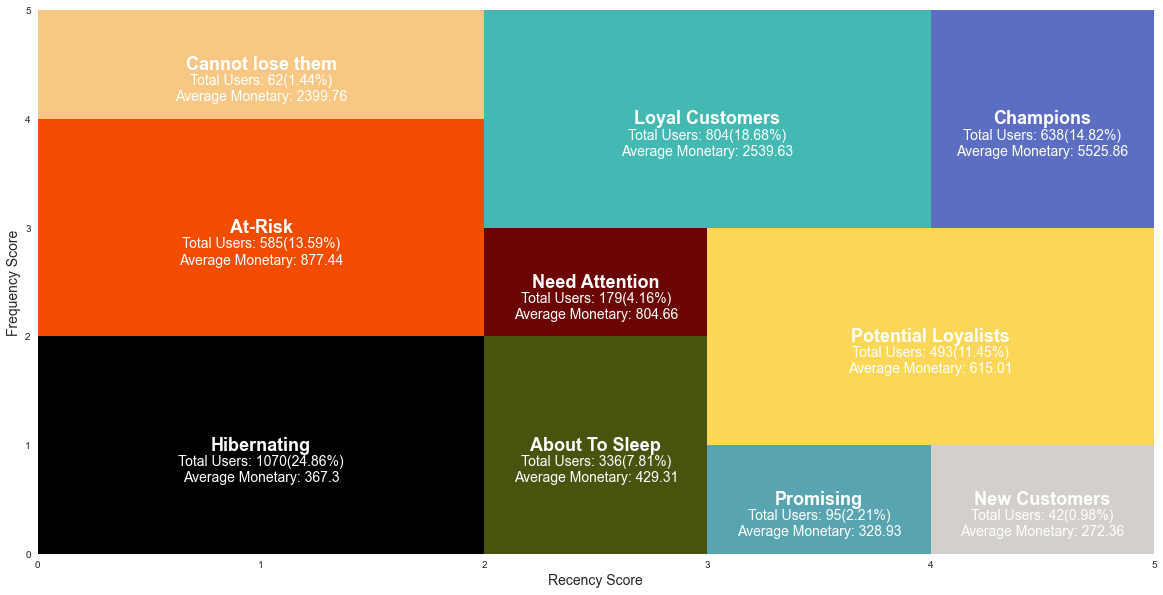

In [66]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ['#5b6ec2', "#44b8b2", "#F9C784", "#F24C00", "#000000",
           "#47540d", "#58A4B0", "#D3D0CB", "#FCD757", "#6B0504"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)
    
    users = rfm_table[rfm_table.SegmentName == key].shape[0]
    users_percentage = (rfm_table[rfm_table.SegmentName == key].shape[0] / rfm_table.shape[0]) * 100
    avg_monetary = rfm_table[rfm_table.SegmentName == key]["Monetary"].mean()
    
    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))
    
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    
    ax.set_xlabel("Recency Score", fontsize = 14)
    ax.set_ylabel("Frequency Score", fontsize = 14)
    
sns.despine(left = True, bottom = True)
plt.show()

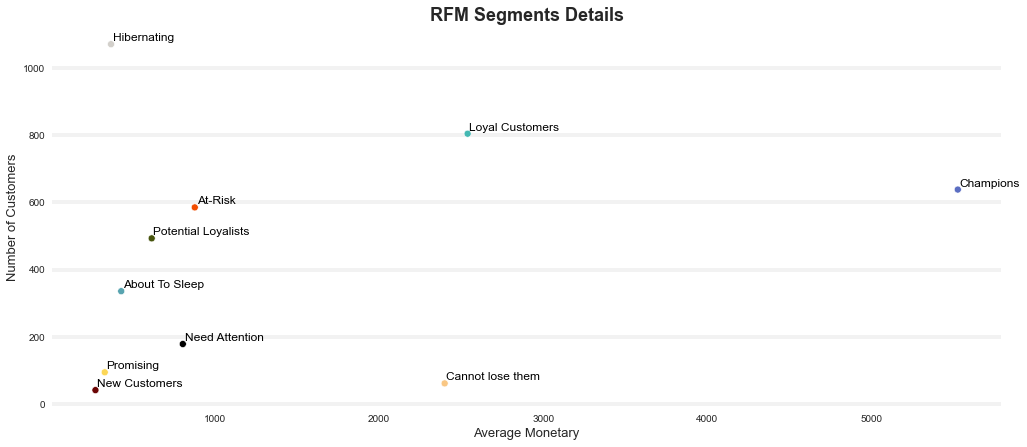

In [67]:
rfm_table2 = rfm_table.reset_index()

rfm_monetary_size = rfm_table2.groupby("SegmentName").agg({"Monetary": "mean",
                                                       "CustomerID": "nunique"})

rfm_monetary_size.rename(columns = {"Monetary": "MeanMonetary", "CustomerID": "CustomerCount"}, inplace = True)
rfm_monetary_size = rfm_monetary_size.sort_values("MeanMonetary", ascending = False)
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots(figsize = (17, 7),facecolor='white')

sns.scatterplot(x = rfm_monetary_size.MeanMonetary, y = rfm_monetary_size.CustomerCount, 
                ax = ax, color = "#ffd630",hue=rfm_monetary_size.index,
                legend=False,palette=palette)

ax.set_xlabel('Average Monetary',size=13)
ax.set_ylabel('Number of Customers',size=13)

for y, x, z in zip(rfm_monetary_size.index,rfm_monetary_size.CustomerCount,rfm_monetary_size.MeanMonetary):
    ax.text(z + 11, x+10, str(y), color = "black", fontweight = "normal")

plt.title("RFM Segments Details",size=18,fontweight=660)
ax.grid(axis='y',color='#f2f2f2',linewidth=4)
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

In [68]:
rfm = rfm_table2.groupby("SegmentName").agg({"CustomerID": "nunique", 
                                        "Recency": "mean",
                                        "Frequency": "mean",
                                        "Monetary": "mean"})
rfm.rename(columns = {"CustomerID": "Segment Size"}, inplace = True)

cm = sns.light_palette("#ffcc00", as_cmap = True)

rfm.T.style.background_gradient(cmap = cm, axis = 1)\
.set_precision(2)\
.highlight_min(axis = 1, color = "#91adff")\
.highlight_max(axis = 1, color = "#ff715e")

SegmentName,About To Sleep,At-Risk,Cannot lose them,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Segment Size,336.00,585.00,62.00,638.00,1070.00,804.00,179.00,42.00,493.00,95.00
Recency,53.03,152.21,131.69,6.03,216.76,33.24,52.14,7.17,17.18,23.61
Frequency,1.14,2.85,8.27,12.08,1.09,6.39,2.31,1.00,1.98,1.00
Monetary,429.31,877.44,2399.76,5525.86,367.30,2539.63,804.66,272.36,615.01,328.93


- Red color represents maximum value per index and column 
- Blue color represents minimum value per index and column 

The most "recency" and "segment size" is Hibernating
and the most "frequency" and "monetary" is Champions

In [69]:
monetary_per_segment = (rfm_table2.groupby("SegmentName")["Monetary"].sum() /\
                        rfm_table2.groupby("SegmentName")["Monetary"].sum().sum()).sort_values(ascending = False)

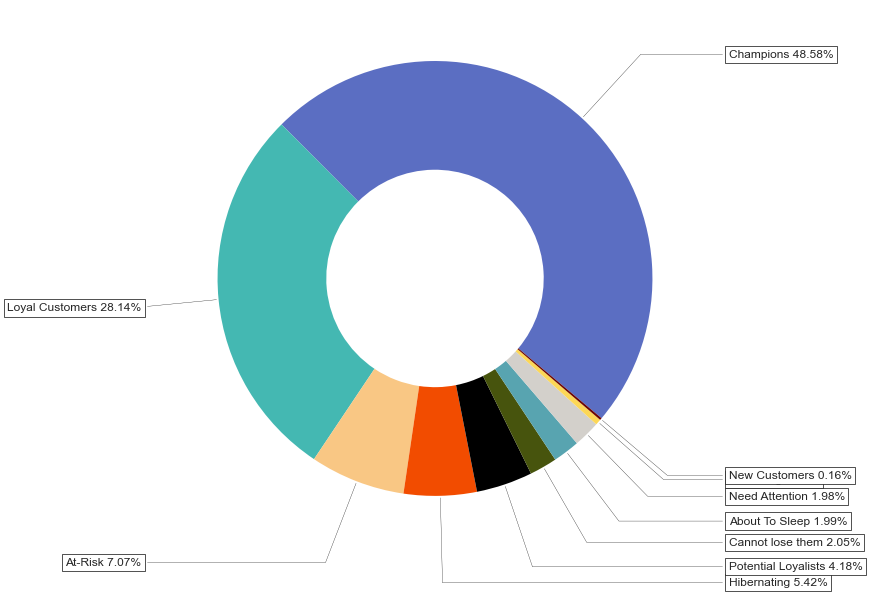

In [70]:
fig, ax = plt.subplots(figsize = (10, 10), facecolor = "white")

wedges, texts = ax.pie(monetary_per_segment.values, wedgeprops=dict(width=0.5), startangle=-40, normalize=False, colors = palette)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(monetary_per_segment.index[i] + " " + str(round(monetary_per_segment[i] * 100, 2)) + "%", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)
plt.show()

In [77]:
monetary_per_segment

SegmentName
Champions              0.485831
Loyal Customers        0.281379
At-Risk                0.070735
Hibernating            0.054159
Potential Loyalists    0.041783
Cannot lose them       0.020503
About To Sleep         0.019878
Need Attention         0.019849
Promising              0.004306
New Customers          0.001576
Name: Monetary, dtype: float64

## Customer Segmentation  using RFM Metrics

In [71]:
rfm_clustering = rfm_table2[["Recency", "Frequency", "Monetary", "SegmentName"]]
scaler = StandardScaler()
rfm_clustering[['Recency','Frequency','Monetary']] = np.log(rfm_clustering[['Recency','Frequency','Monetary']])
rfm_clustering[['Recency','Frequency','Monetary']] = scaler.fit_transform(rfm_clustering[['Recency','Frequency','Monetary']])

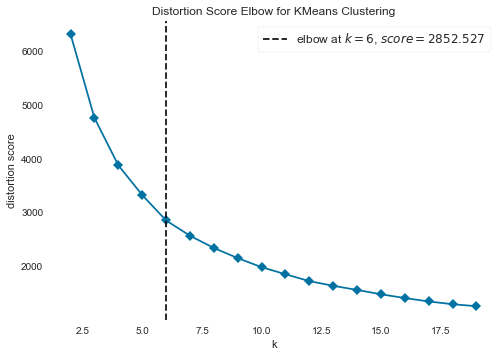

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
kmeans = KMeans(random_state=0)

visualizer = KElbowVisualizer(kmeans, k=(2,20),timings=False)
visualizer.fit(rfm_clustering.drop('SegmentName',axis=1))
sns.despine(top=True,right=True,left=True,bottom=True)
visualizer.show()

In [73]:
kmeans_fix = KMeans(n_clusters=6,random_state=0)
kmeans_fix.fit(rfm_clustering.drop('SegmentName',axis=1))

KMeans(n_clusters=6, random_state=0)

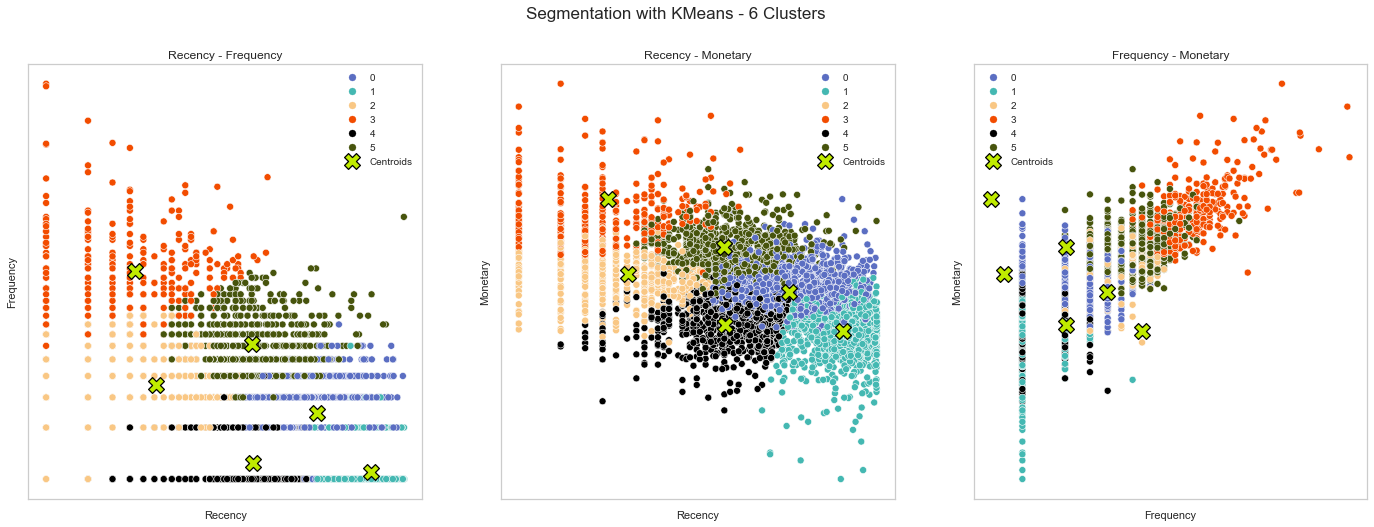

In [74]:
cluster = kmeans_fix.labels_
fig, ax = plt.subplots(1, 3, figsize = (24, 8),facecolor='white')

label = []
for i in rfm_coordinates.keys():
    label.append(i)

for i, feature in list(enumerate(combinations(["Recency", "Frequency", "Monetary"], 2))):

    sns.scatterplot(x = rfm_clustering[feature[0]], y = rfm_clustering[feature[1]], hue = cluster, 
                    palette = palette[: len(set(cluster))], ax = ax[i]).set_title(feature[0] + " - " + feature[1])

    sns.scatterplot(x = kmeans_fix.cluster_centers_[:, 0], y = kmeans_fix.cluster_centers_[:, 1],
                    s = 250, color = '#C0EB00', label = 'Centroids', marker = "X", ax = ax[i], edgecolor = "black")

plt.suptitle("Segmentation with KMeans - 6 Clusters",size=17)
# for ax in ax:
    # ax.legend(labels=label[:5])
for ax in ax:
    ax.set_xticklabels('')
    ax.set_yticklabels('')
plt.show()

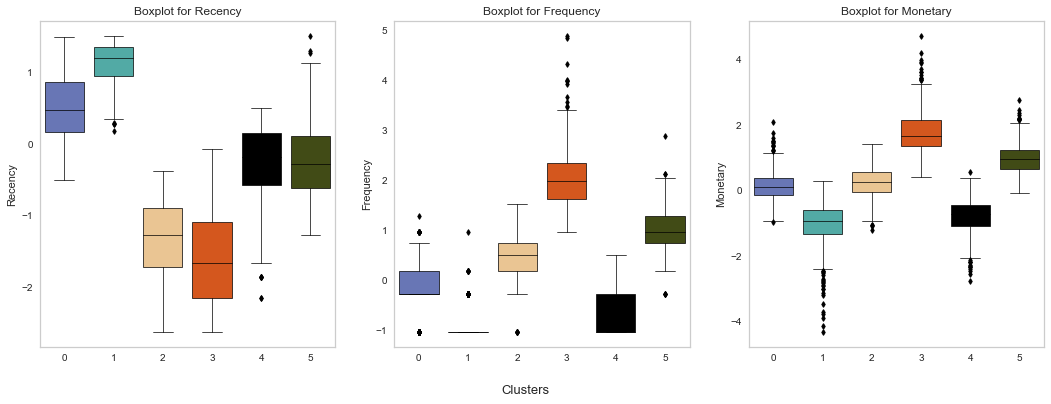

In [75]:
fig, axi = plt.subplots(1, 3, figsize = (18, 6))

  
sns.boxplot(x = cluster, y = "Recency", data = rfm_clustering, ax = axi[0],
            linewidth=0.7,fliersize=4,palette=palette).set_title("Boxplot for Recency")
sns.boxplot(x = cluster, y = "Frequency", data = rfm_clustering, ax = axi[1],
            linewidth=0.7,fliersize=4,palette=palette).set_title("Boxplot for Frequency")
sns.boxplot(x = cluster, y = "Monetary", data = rfm_clustering, ax = axi[2],
            linewidth=0.7,fliersize=4,palette=palette).set_title("Boxplot for Monetary")

fig.supxlabel('\nClusters',size=13)
plt.show()

In [76]:
rfm_table2.SegmentName.unique()

array(['Champions', 'At-Risk', 'Promising', 'Hibernating',
       'Loyal Customers', 'Potential Loyalists', 'Need Attention',
       'New Customers', 'About To Sleep', 'Cannot lose them'],
      dtype=object)